### 13-3 手寫數字辨識

# 引入會用到的函式

mnist : 下載會用到的手寫辨識資料

to_categorical : 將分類作one-hot encoding

Sequential : 建立一個網路層疊加的線性模型框架

Dense : 一層全連接層

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#繪圖工具
import matplotlib.pyplot as plt

#下載mnist資料集，將裡頭的資料分成訓練集和測試集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
#輸出一張訓練集裡的數字圖片
plt.imshow(X_train[0], cmap="gray")
plt.axis("off")
plt.show()
print(Y_train[0])

#看看圖片的向量
print(X_train[0])

#輸出一張測試集裡的數字圖片
plt.imshow(X_test[0], cmap="gray")
plt.axis("off")
plt.show()
print(Y_test[0])

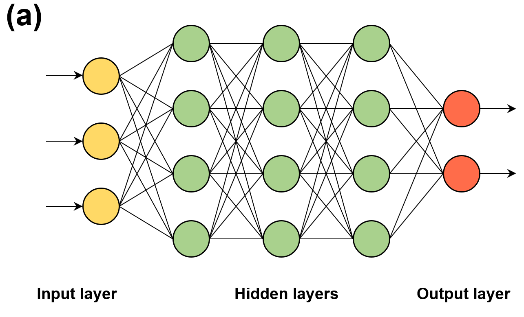

In [ ]:
print(X_train.shape)

#為了讓資料符合模型的輸入，把資料攤平
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")

#因為灰階圖片的向量值界在0~255間，太大了，所以除以255，讓向量維持在0~1間
X_train = X_train/255
X_test = X_test/255

#輸出訓練集的形狀，和原先作比較
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#對分類的標籤作one-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print(Y_train.shape)


print(Y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#建立模型

第一層有16個神經元、第二層32個、第三層64個、第四層10個 (輸出層)

In [ ]:
#建立模型

model = Sequential()
model.add(Dense(16, input_dim=28*28, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
#輸出層要把圖片分成10種種類，通常使用softmax當作activation function
model.add(Dense(10, activation="softmax"))

#查看模型架構合參數
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 15,866
Trainable params: 15,866
Non-trainable params: 0
_________________________________________________________________


# 開始訓練！

Loss_function : 分類任務通常使用 crossentropy 來算，這裡用的是變化版的

Optimizer : 使用 Adam 來優化我們的learning rate

Validation_split : 用來切割訓練集和驗證集，測試模型是否理想

Epochs : 訓練過程中資料將被「輪」多少次。

batch_size : 資料集大小/batch_size 是一個epoch要跑的資料數量，下一個epoch的參數會沿用上一次的，達到訓練更好的效果

**一個epoch的資料數量 : 60000 * 0.8 / 128 = 375


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=10, batch_size=128, verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.6383 - accuracy: 0.8118 - val_loss: 0.2982 - val_accuracy: 0.9115
Epoch 2/10
 - 0s - loss: 0.2897 - accuracy: 0.9161 - val_loss: 0.2510 - val_accuracy: 0.9277
Epoch 3/10
 - 0s - loss: 0.2446 - accuracy: 0.9280 - val_loss: 0.2097 - val_accuracy: 0.9402
Epoch 4/10
 - 0s - loss: 0.2136 - accuracy: 0.9357 - val_loss: 0.1965 - val_accuracy: 0.9415
Epoch 5/10
 - 0s - loss: 0.1891 - accuracy: 0.9449 - val_loss: 0.1892 - val_accuracy: 0.9450
Epoch 6/10
 - 0s - loss: 0.1722 - accuracy: 0.9480 - val_loss: 0.1840 - val_accuracy: 0.9469
Epoch 7/10
 - 0s - loss: 0.1566 - accuracy: 0.9535 - val_loss: 0.1645 - val_accuracy: 0.9522
Epoch 8/10
 - 0s - loss: 0.1459 - accuracy: 0.9569 - val_loss: 0.1560 - val_accuracy: 0.9548
Epoch 9/10
 - 0s - loss: 0.1362 - accuracy: 0.9590 - val_loss: 0.1530 - val_accuracy: 0.9551
Epoch 10/10
 - 0s - loss: 0.1268 - accuracy: 0.9617 - val_loss: 0.1496 - val_accuracy: 0.9579


In [ ]:
#將訓練好的模型，利用測試集作預測

loss, accuracy = model.evaluate(X_train, Y_train)
print("acc of training data = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("acc of testing data = {:.2f}".format(accuracy))

60000/60000 [==============================] - 1s 10us/step
acc of training data = 0.96
10000/10000 [==============================] - 0s 12us/step
acc of testing data = 0.95


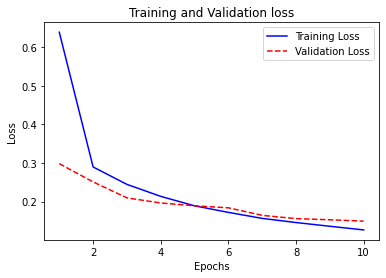

In [ ]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "r--", label="Validation Loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

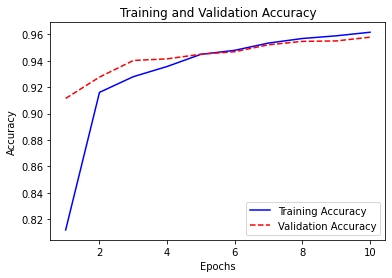

In [ ]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(epochs)+1)
plt.plot(epochs, accuracy, "b-", label="Training Accuracy")
plt.plot(epochs, val_acc, "r--", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#predict = model.predict_classes(X_test)
#predict[0]

predict_x = model.predict(X_test)
predict_x[0]

#plt.imshow(X_train[0], cmap="gray")
#plt.axis("off")
#plt.show()

array([6.0223721e-07, 2.7201204e-06, 6.0771249e-04, 1.8522876e-03,
       3.2990673e-08, 4.9062692e-07, 6.7871213e-13, 9.9737155e-01,
       2.9255740e-05, 1.3525460e-04], dtype=float32)